In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook 
import pickle
from glob import glob 

In [2]:
def get_mean_acc(acc,epochs):
    num_task=len(acc)
    temp=np.zeros((num_task,len(acc[0])))
    for t,v in acc.items():
        temp[t,range(t * epochs, num_task * epochs)]=v
        if t<num_task-1:
            temp[t+1,:]=temp[:t+1,:].mean(0)
    return temp.mean(0)

In [3]:
d=glob('./perm_mnist_10Run/*.pkl')

In [4]:
epochs=20
length=200
num_task=10
mean_acc=list()

for k in range(5):
    temp=list()
    for n,filename in enumerate(d):
        [losses,accuracies]=pickle.load(open(filename,'rb'))
        temp.append(get_mean_acc(accuracies[k],epochs))    
    mean_acc.append(np.asarray(temp))

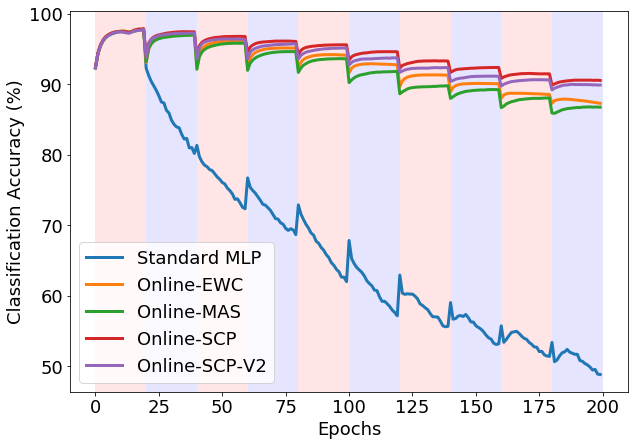

In [5]:
plt.figure(figsize=(10,7))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)

for t in range(5):
    plt.plot(100*mean_acc[t].mean(0),linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Standard MLP','Online-EWC','Online-MAS','Online-SCP','Online-SCP-V2'],fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Classification Accuracy (%)',fontsize=18)
plt.show()

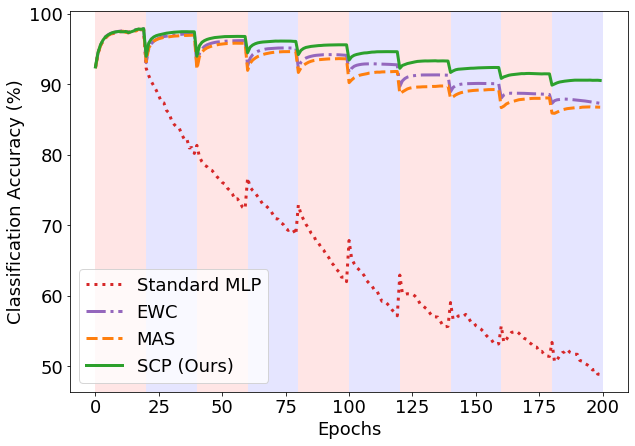

In [15]:
plt.figure(figsize=(10,7))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)

ls=[':','-.','--','-']    
colors=['C3','C4','C1','C2']
for t in range(4):
    plt.plot(100*mean_acc[t].mean(0),c=colors[t],ls=ls[t],linewidth=3)

    
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Standard MLP','EWC','MAS','SCP (Ours)'],fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Classification Accuracy (%)',fontsize=18)
plt.show()

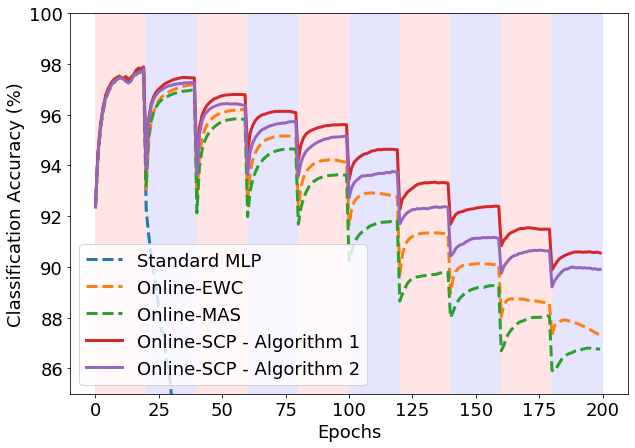

In [7]:
plt.figure(figsize=(10,7))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)

for t in range(5):
    if t<3:
        plt.plot(100*mean_acc[t].mean(0),'--',linewidth=3)
    else:
        plt.plot(100*mean_acc[t].mean(0),'-',linewidth=3)
plt.ylim(85,100) 
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Standard MLP','Online-EWC','Online-MAS','Online-SCP - Algorithm 1','Online-SCP - Algorithm 2'],fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Classification Accuracy (%)',fontsize=18)
plt.show()


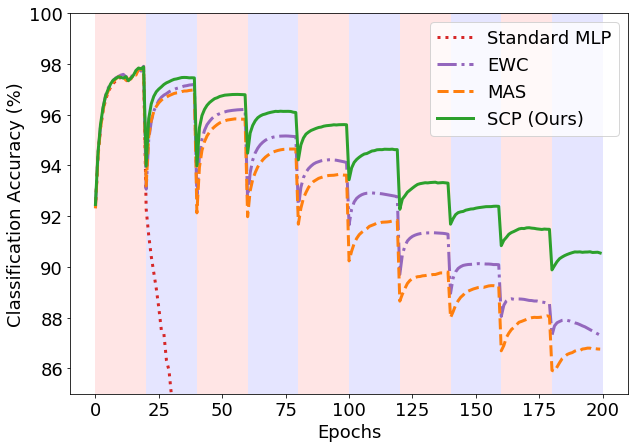

In [14]:
plt.figure(figsize=(10,7))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)

ls=[':','-.','--','-']    
colors=['C3','C4','C1','C2']
for t in range(4):
    plt.plot(100*mean_acc[t].mean(0),c=colors[t],ls=ls[t],linewidth=3)
    
plt.ylim(85,100) 
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Standard MLP','EWC','MAS','SCP (Ours)'],fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Classification Accuracy (%)',fontsize=18)
plt.show()


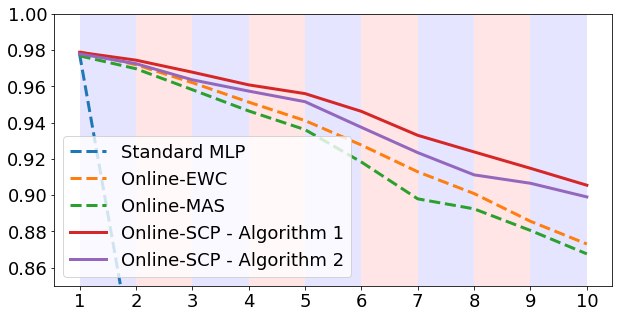

In [9]:
inds=np.arange(19,200,20)
x=np.arange(1,11)

plt.figure(figsize=(10,5))
for t in range(1,num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t, (t+1), facecolor=c, alpha=0.1)

for t in range(5):
    if t<3:
        plt.plot(x,mean_acc[t].mean(0)[inds],'--',linewidth=3)
    else:
        plt.plot(x,mean_acc[t].mean(0)[inds],linewidth=3)
plt.ylim(.85,1.) 
plt.xticks(x,fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Standard MLP','Online-EWC','Online-MAS','Online-SCP - Algorithm 1','Online-SCP - Algorithm 2'],fontsize=18)
plt.show()
